## Creating charts with Altair (SOLUTIONS)

Welcome! This notebook is the SOLUTIONS FILE that will walk you through creating charts with the Python library Altair. If you want to try to create the charts yourself, open up the `fun-with-altair.ipynb` file.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

We're going to import our first dataset. It's a file with data on internet access in Vermont households between 2013 and 2017.

In [2]:
internet_vt = pd.read_csv("data/internet-vt-5yr.csv")
internet_vt.head()

,year,no-internet,internet,internet-access-no-sub
0,2013,48591,195037,9606
1,2014,46029,198660,12540
2,2015,42129,202770,9966
3,2016,34919,209394,10538
4,2017,33400,210329,12900


Great.

Now that we have that in place, let's make a line chart that looks at the `year` on the x-axis and the number of households that report `no-internet` access on the y-axis.

The x-axis numbering may look a bit weird, so read up on specifying data types in the Altair documentation and see if you can fix that.

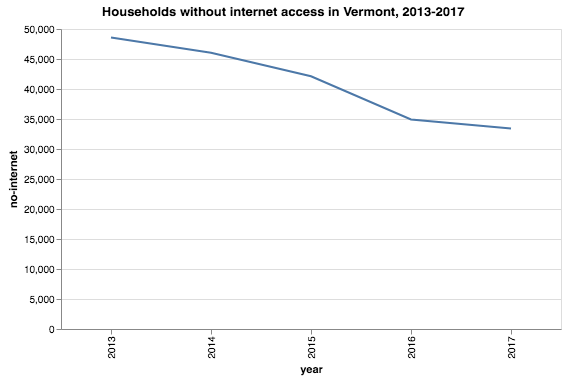

In [3]:
alt.Chart(internet_vt).mark_line().encode(
    x="year:O",
    y="no-internet"
).properties(
    width=500,
    title="Households without internet access \
in Vermont, 2013-2017"
)

Next, we're going to read in a file with a subset of that data, so we can focus in on the households without internet. While we're at it, let's also recast the year column to datetime format.

In [4]:
nointernet = pd.read_csv("data/internet-vt-pct-5yr.csv")
nointernet["year"] = pd.to_datetime(
    nointernet["year"], format="%Y"
)
nointernet.head()

,year,no-internet,households,no-internet-pct
0,2013-01-01,48591,253234,0.191882
1,2014-01-01,46029,257229,0.178942
2,2015-01-01,42129,254865,0.165299
3,2016-01-01,34919,254851,0.137017
4,2017-01-01,33400,256629,0.130149


Create an area chart that shows the households with `no-internet` by year.

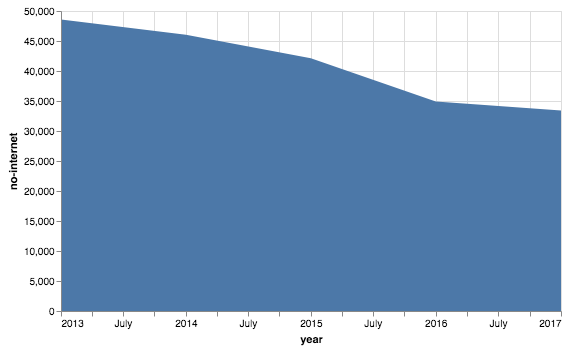

In [5]:
alt.Chart(nointernet).mark_area().encode(
    x="year:T",
    y="no-internet:Q"
).properties(
    width=500
)

That's interesting, but we don't know anything about how the *proportion* of households changed over those years. Luckily, there's a column for that. Change the the y-axis to `no-internet-pct`.

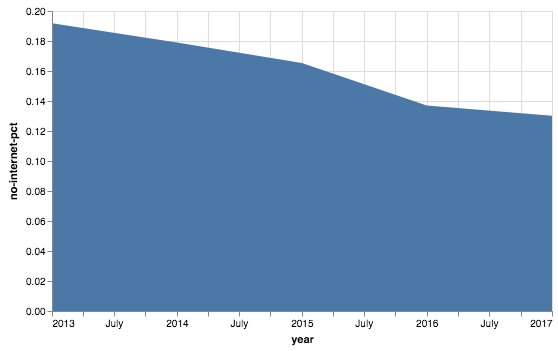

In [6]:
alt.Chart(nointernet).mark_area().encode(
    x="year:T",
    y="no-internet-pct:Q"
).properties(
    width=500
)

That's great, but what does it look like in context? For that, we'll need to reformat our first `internet_vt` dataset. We're just changing it from wide (each category gets a column) to long (there's a category column and a value column). That means there are multiple rows per year. 

In [7]:
internet_vt_long = pd.melt(internet_vt,
                           id_vars=["year"])
internet_vt_long.head()

,year,variable,value
0,2013,no-internet,48591
1,2014,no-internet,46029
2,2015,no-internet,42129
3,2016,no-internet,34919
4,2017,no-internet,33400


Now we can create an chart that shows us all three categories. Create an area chart using the `internet_vt_long` dataset. How do you get it to show the different categories separately for each year?

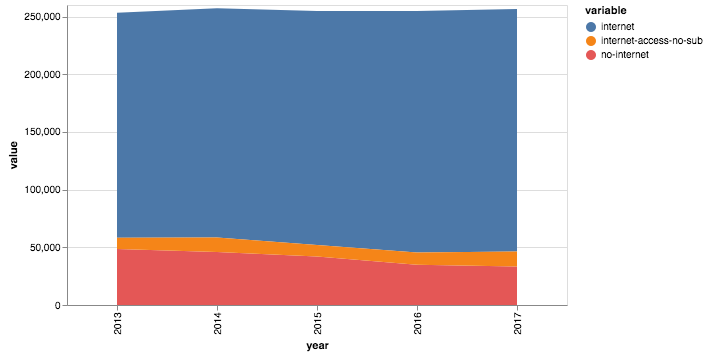

In [8]:
alt.Chart(internet_vt_long).mark_area().encode(
    x="year:O",
    y="value:Q",
    color="variable:N"
).properties(
    width=500
)

Can you show that as a normalized area chart? I.e. the categories add up to 100%?

Bonus: Figure out how to create a tooltip so when you hover over each area, it tells you the year, category and value.

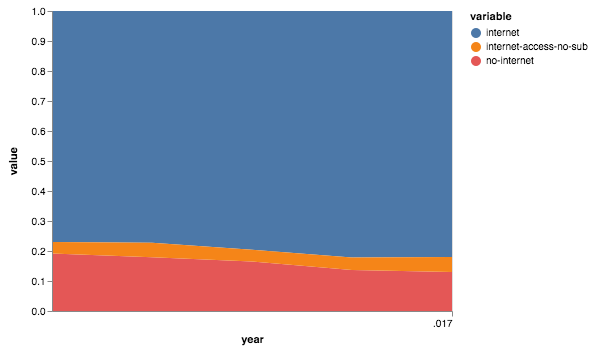

In [9]:
alt.Chart(internet_vt_long).mark_area().encode(
    x="year:T",
    y=alt.Y("value:Q", stack="normalize"),
    color="variable:N",
    tooltip=['year', 'variable', 'value']
)


You're making good progress! Let's load in a new dataset and run through a couple other chart types quickly.

In [10]:
rural_internet = pd.read_csv("data/internetrural-vt-county-2017.csv")
rural_internet.head()

,county-name,no-internet-pct,rural-pct
0,Addison County,0.168220,0.784
1,Bennington County,0.173757,0.645
2,Caledonia County,0.228543,0.744
3,Chittenden County,0.107109,0.260
4,Essex County,0.282353,1.000


Create a bar chart using `county-name` and `no-internet-pct`.

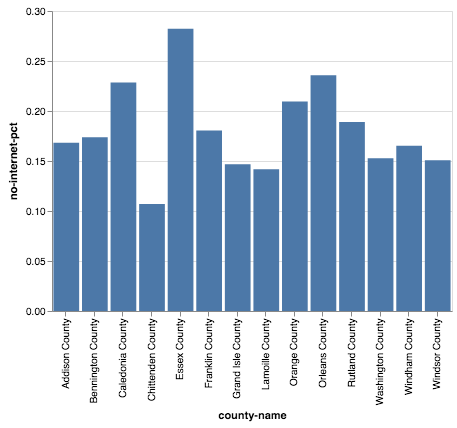

In [11]:
alt.Chart(rural_internet).mark_bar().encode(
    x="county-name",
    y="no-internet-pct"
).properties(
    width=400
)

Cool. How about a scatterplot comparing `no-internet-pct` and `rural-pct`? This would be a good time to practice those tooltip skills.

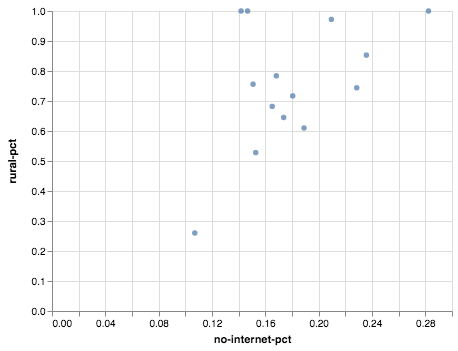

In [12]:
alt.Chart(rural_internet).mark_circle().encode(
    x="no-internet-pct",
    y="rural-pct",
    tooltip=["county-name","no-internet-pct", "rural-pct"]
)

Now that you've got that down, save each of those charts to a variable and put them into one chart. Try concatenating them vertically.

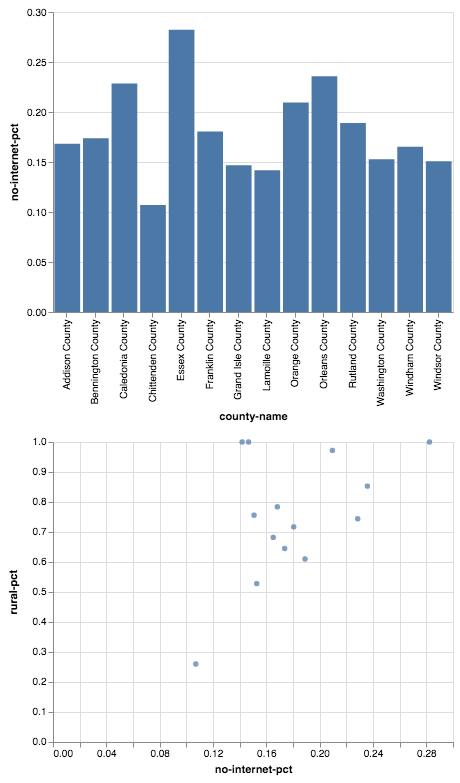

In [13]:
bar = alt.Chart(rural_internet).mark_bar().encode(
    x="county-name",
    y="no-internet-pct"
).properties(
    width=400
)

scatter = alt.Chart(rural_internet).mark_circle().encode(
    x="no-internet-pct",
    y="rural-pct",
    tooltip=["county-name","no-internet-pct", "rural-pct"]
)

alt.vconcat(
    bar,
    scatter
)

Almost done, but there's one more cool thing we should cover: maps! Altair's map handling is still relatively new and is the most difficult part of the library to use, since it involves geojson files and map projections. But it's fun to use!

For that, let's load in a national version of this data. We'll look at the percentage of households without internet access in every county across the nation in 2017.

In [14]:
internet_natl = pd.read_csv("data/internet-natl-county-2017.csv")
internet_natl.head()

,households,no-internet,county-name,county,state,code,no-internet-pct
0,11026.0,5686.0,"Corozal Municipio, Puerto Rico",47,72,72047,0.515690
1,3976.0,2157.0,"Maunabo Municipio, Puerto Rico",95,72,72095,0.542505
2,7132.0,2972.0,"Peñuelas Municipio, Puerto Rico",111,72,72111,0.416713
3,53341.0,25042.0,"Ponce Municipio, Puerto Rico",113,72,72113,0.469470
4,14278.0,8622.0,"San Sebastián Municipio, Puerto Rico",131,72,72131,0.603866


Now, use the `no-internet-pct` column and the `data/us-10m.json` dataset to create a national map of internet access. You're going to need to use the `.transform_lookup` function to merge the two datasets, using the `id` column in the json file and the `code` column in the `internet_natl` file.

Good luck!

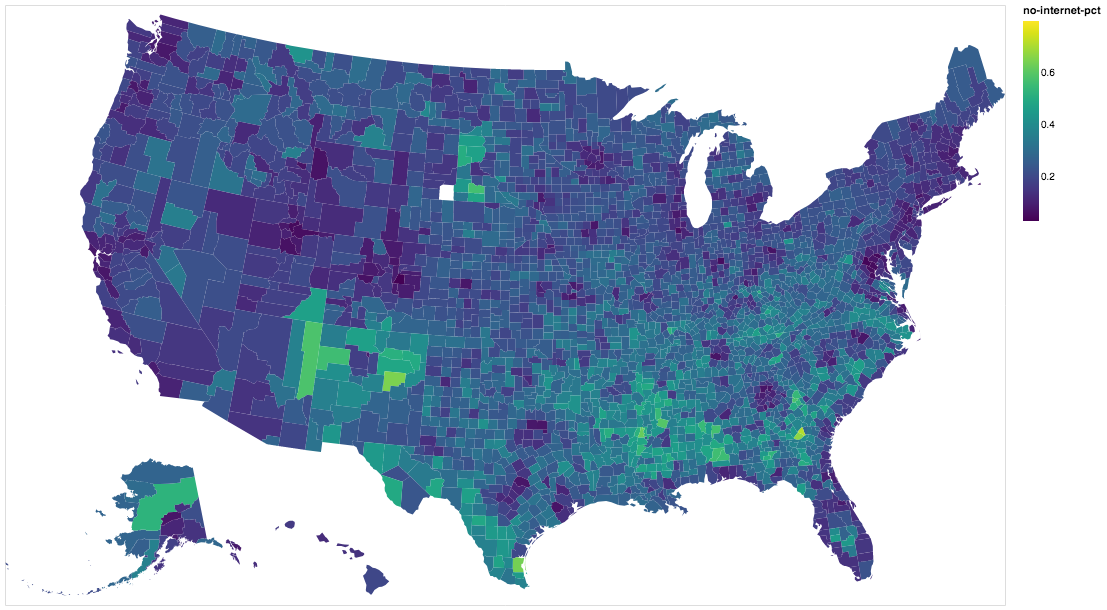

In [15]:
counties = alt.topo_feature("data/us-10m.json", 'counties')
alt.Chart(counties).mark_geoshape().encode(
    color="no-internet-pct:Q",
    tooltip=["county-name:N", "no-internet-pct:Q"]
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(internet_natl, "code", ["county-name","no-internet-pct"])
).project(
    type="albersUsa"
).properties(
    width=1000,
    height=600
)